# Costumers Segmentation I K- Means

### Latar Belakang
Costumer dengan berbagai karakteristik, beserta pengeluaran dan pendapatan yang berbeda-beda menjadikan segmentasi-segmentasi yang dapat di analisis. Berangkat dari fakta akan  berbagai latar belakang costumer  yang cenderung dapat dikelompokan menurut kebiasaan atas dasar pendapatan maupun usia. 

### Project Objective
Project ini dilakukan untuk memetakan costumer menjadi beberapa segmentasi-segmentasi yang dapat di analisis. Dengan didasari karakteristik costumer akan kebiasaan dalam berbelanja, agar terciptanya segmentasi pelanggan-pelanggan dari berbagai variabel. sehingga pemahaman segmentasi dapat diberikan kepada tim pemasaran dan merencanakan strategi yang sesuai.

Dataset Link : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# Import #

In [17]:
# import requirement libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Data Exploration

In [18]:
data = pd.read_csv("Mall_Customers.csv", encoding='latin')
data

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [19]:
for col in data:
    print(f"{col}:{data[col].nunique()}")

CustomerID:200
Gender:2
Age:51
Annual Income (k$):64
Spending Score (1-100):84


In [20]:
data.info()
print(data.Gender.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Female    112
Male       88
Name: Gender, dtype: int64


In [21]:
data.isna().sum() # cek missing value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory Data Analysis (EDA)

In [22]:
df = data.copy()
df.drop("CustomerID", axis=1, inplace=True) # Drop CustomerID column

In [23]:
df.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

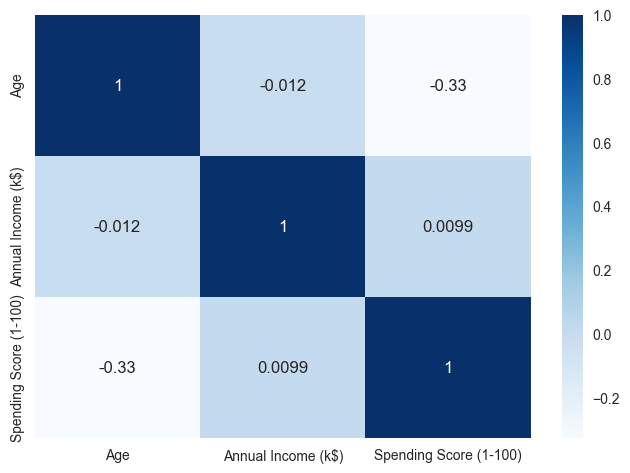

In [24]:
corr = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

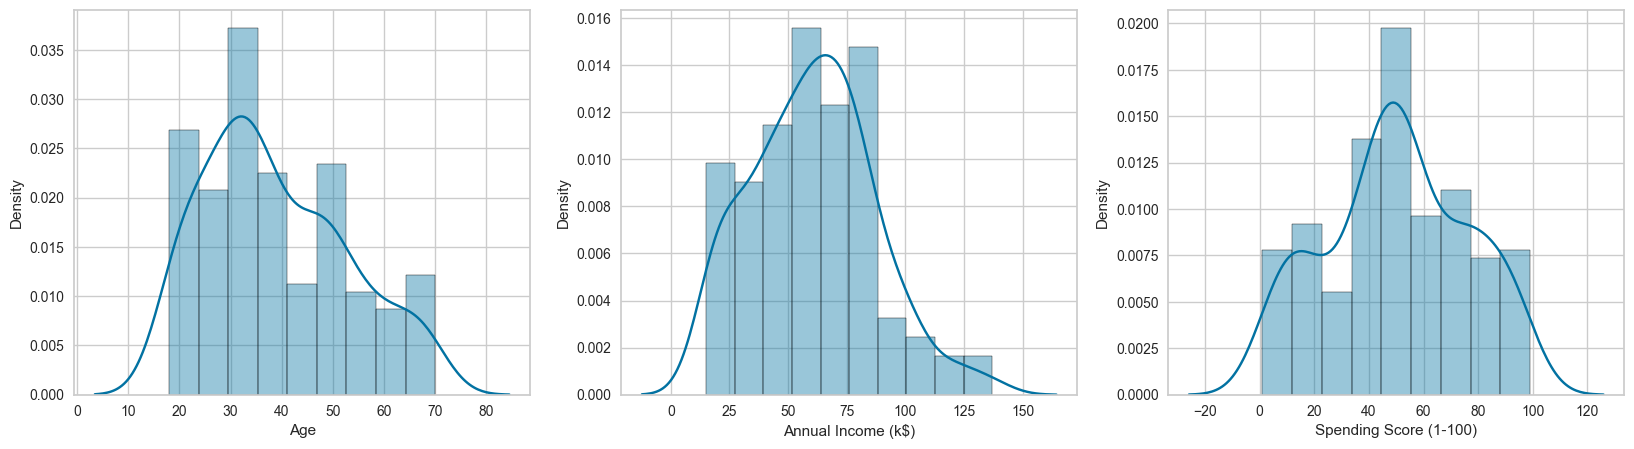

In [25]:
plt.figure(figsize=(20,5))

# Density of age
plt.subplot(1,3,1)
sns.histplot(df['Age'],kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4)

# Density of ıncome
plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'],kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4)

# Density of spending
plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'],kde=True,stat="density", kde_kws=dict(cut=3), alpha=.4)

plt.show()

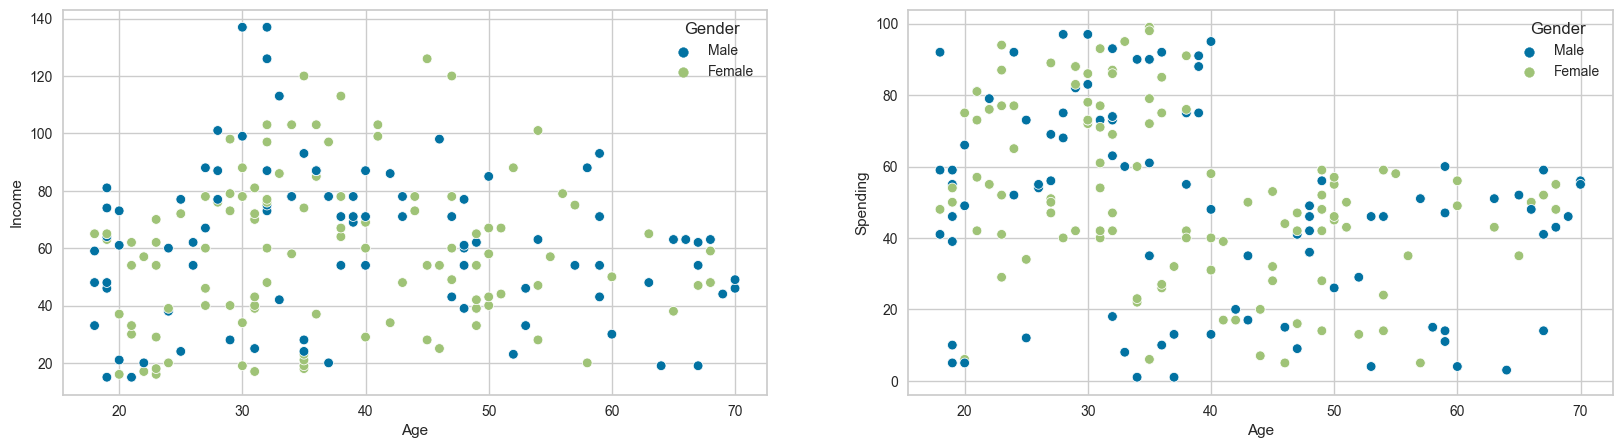

In [26]:
female = df[df.Gender == 'Female']
male = df[df.Gender == 'Male']

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Income')

plt.subplot(1,2,2)
sns.scatterplot(data = df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.show()

In [27]:
features = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [28]:
# feature scaling
scaler = StandardScaler()
model = scaler.fit(features)
feature_scaled = model.transform(features)

# Clustering

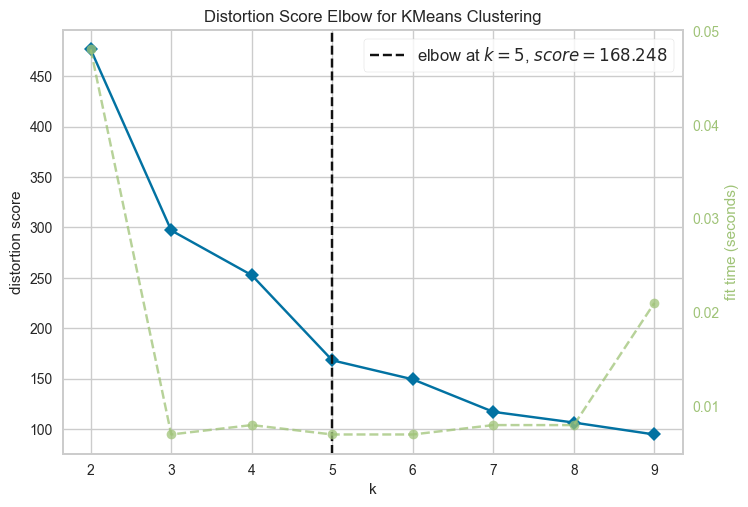

In [29]:
# Elbow method
model = KMeans(random_state=0, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(feature_scaled)
visualizer.show()
plt.show()

In [33]:
km = KMeans(n_clusters=5,  n_init='auto')
y_predicted = km.fit_predict(feature_scaled)
df['cluster']=y_predicted
df.head(10)

Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0    Male   19                  15                      39        0
1    Male   21                  15                      81        0
2  Female   20                  16                       6        0
3  Female   23                  16                      77        0
4  Female   31                  17                      40        0
5  Female   22                  17                      76        0
6  Female   35                  18                       6        3
7  Female   23                  18                      94        0
8    Male   64                  19                       3        3
9  Female   30                  19                      72        0

In [34]:
clusters = km.labels_
X = features.assign(cluster = clusters)
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [35]:
fig27 = px.scatter(X,x='Annual Income (k$)',y='Spending Score (1-100)',color='cluster',title='2-D Visualisation of KMeans')
fig27.show()

In [36]:
fig27 = px.scatter(X,x='Age',y='Spending Score (1-100)',color='cluster',title='2-D Visualisation of KMeans')
fig27.show()